In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

## Laboratory work 3

## №1

In [ ]:
df = pd.read_csv('data.csv', header=0)
z = list(df.Z)
delta = list(df.delta)
n = 97

x_ = np.arange(min(z), max(z) + 1, 1).tolist()


In [ ]:
def Lambda_1n(x):
    sum = 0
    for j in range(n):
        if delta[j] == 1 and z[j] <= x:
            s = 0
            for i in range(n):
                if z[i] >= z[j]:
                    s += 1
            sum += 1 / s
    return sum


L_1n = []
for i in range(len(x_)):
    L_1n.append(Lambda_1n(x_[i]))

In [ ]:
F_AB = []
for i in range(len(L_1n)):
    F_AB.append(1 - np.exp(-L_1n[i]))

In [ ]:
def Funk_KM(x):
    mult = 1
    for j in range(n):
        if delta[j] == 1 and z[j] <= x:
            s = 0
            for i in range(n):
                if z[i] >= z[j]:
                    s += 1
            mult *=1 - 1 / s
    return 1 - mult


F_KM = []
for i in range(len(x_)):
    F_KM.append(Funk_KM(x_[i]))

In [ ]:
def Lambda_n(x):
    sum = 0
    for j in range(n):
        if z[j] <= x:
            s = 0
            for i in range(n):
                if z[i] >= z[j]:
                    s += 1
            sum += 1 / s
    return sum


L_n = []
for i in range(len(x_)):
    L_n.append(Lambda_n(x_[i]))

In [ ]:
def Func_RR(x):
    sum = 0
    for j in range(n):
        if z[j] > x:
            sum += 1
    return 1 - (sum / n) ** (L_1n[i] / L_n[i])


F_RR = []
for i in range(len(x_)):
    F_RR.append(Func_RR(x_[i]))

# F_RR[len(x_)-1]=F_RR[len(x_)-2]
# F_RR


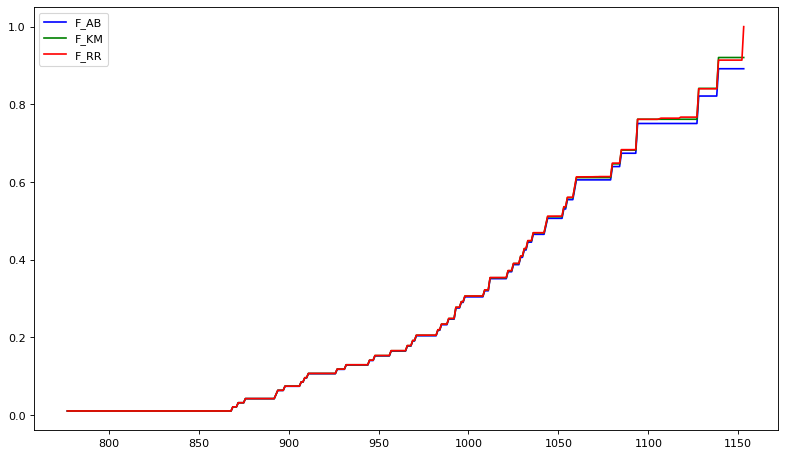

In [ ]:
plt.figure(figsize=(12,7), dpi=80)
plt.plot(x_,F_AB, color='b')
plt.plot(x_,F_KM, color='g')
plt.plot(x_,F_RR, color='r')
plt.legend(['F_AB', 'F_KM', 'F_RR'])

plt.show()


## №2

In [ ]:
lambda_alpha = 1.37
alpha = 0.05
T = 1128

In [ ]:
def D_n(x):
    sum = 0
    for j in range(n):
        if delta[j] == 1 and z[j] <= x:
            s = 0
            for i in range(n):
                if z[i] >= z[j]:
                    s += 1
            sum += 1 / (s ** 2)
    return sum * n


d_n = []
for i in range(len(x_)):
    d_n.append(D_n(x_[i]))

In [ ]:
d_T = D_n(T)

In [ ]:
def M_minus(F, d_n_x):
    return F - n ** (-1 / 2) * (1 - F) * (d_T ** (1 / 2) + lambda_alpha * d_n_x / (d_T ** (1 / 2)))

In [ ]:
def M_plus(F, d_n_x):
    A = F + n ** (-1 / 2) * (d_T ** (1 / 2) + lambda_alpha * d_n_x / (d_T ** (1 / 2)))
    return A / (1 + n ** (-1 / 2) * (d_T ** (1 / 2) + lambda_alpha * d_n_x / (d_T ** (1 / 2))))

In [ ]:
M_minus_AB = []
M_plus_AB = []
M_minus_KM = []
M_plus_KM = []
M_minus_RR = []
M_plus_RR = []

for i in range(len(x_)):
    M_minus_AB.append(M_minus(F_AB[i],d_n[i]))
    M_plus_AB.append(M_plus(F_AB[i],d_n[i]))
    M_minus_KM.append(M_minus(F_KM[i],d_n[i]))
    M_plus_KM.append(M_plus(F_KM[i],d_n[i]))
    M_minus_RR.append(M_minus(F_RR[i],d_n[i]))
    M_plus_RR.append(M_plus(F_RR[i],d_n[i]))



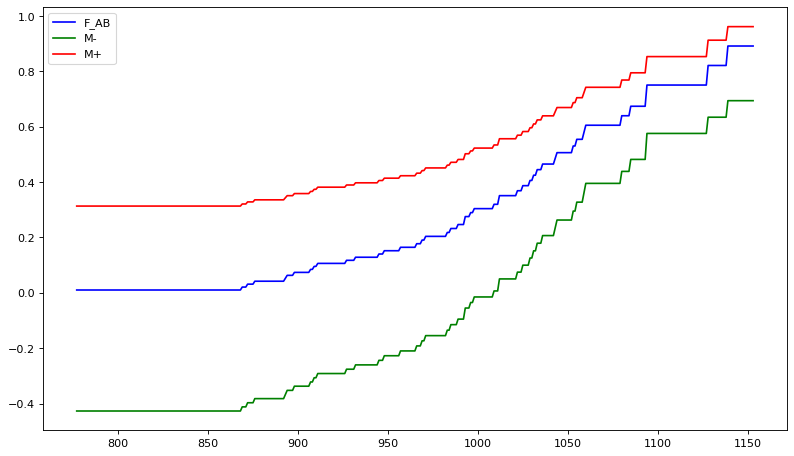

In [ ]:
plt.figure(figsize=(12,7), dpi=80)
plt.plot(x_,F_AB, color='b')
plt.plot(x_,M_minus_AB, color='g')
plt.plot(x_,M_plus_AB, color='r')
plt.legend(['F_AB', 'M-', 'M+'])
plt.show()

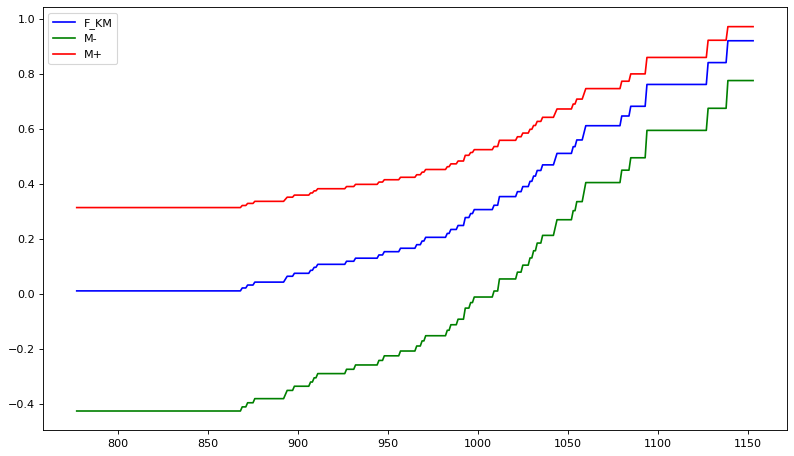

In [ ]:
plt.figure(figsize=(12,7), dpi=80)
plt.plot(x_,F_KM, color='b')
plt.plot(x_,M_minus_KM, color='g')
plt.plot(x_,M_plus_KM, color='r')
plt.legend(['F_KM', 'M-', 'M+'])
plt.show()

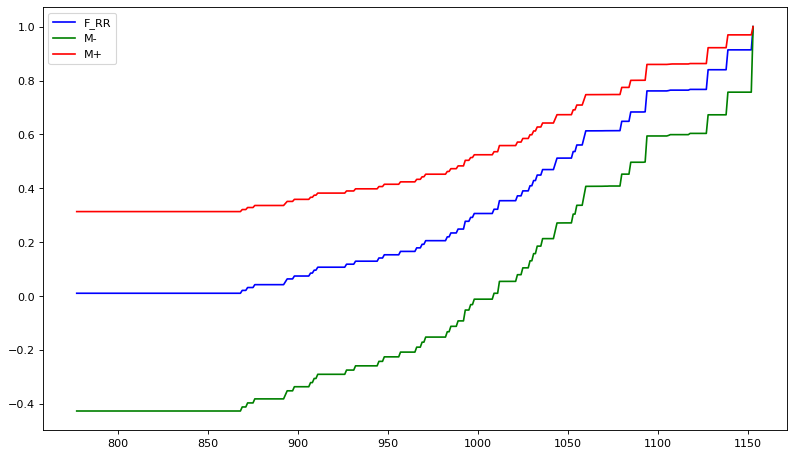

In [ ]:
plt.figure(figsize=(12,7), dpi=80)
plt.plot(x_,F_RR, color='b')
plt.plot(x_,M_minus_RR, color='g')
plt.plot(x_,M_plus_RR, color='r')
plt.legend(['F_RR', 'M-', 'M+'])
plt.show()

## Laboratory work 4
#### Построение ядерных аналогов 4-х оценок и их плотностей:

## №1

#### Ядерные оценки для функции распределения:

In [ ]:
h = n**(-1/3)
# h

In [ ]:
# def normal_standard_distribution(u):
#     return 1/(2*np.pi)**(1/2) * np.exp(-u**2 / 2)

In [ ]:
delta_F_KM = []
for i in range(n-1):
  delta_F_KM.append(Funk_KM(z[i+1])-Funk_KM(z[i]))

# delta_F_KM

In [ ]:
def Funk_nuclear(x, const, f_norm, delta_F, h_n):
    sum=0
    for j in range(1,n):
      if delta_F[j-1] != 0:
        sum+=const*f_norm((x-z[j])/h_n)*delta_F[j-1]
    return sum

In [ ]:
F_nuclear_KM = []
for i in range(len(x_)):
    F_nuclear_KM.append(Funk_nuclear(x_[i], 1 ,norm.cdf, delta_F_KM, h))
# F_nuclear_KM

In [ ]:
delta_F_AB = []
for i in range(n-1):
  delta_F_AB.append(np.exp(-Lambda_1n(z[i]))- np.exp(-Lambda_1n(z[i+1])))
# delta_F_AB

In [ ]:
F_nuclear_AB = []
for i in range(len(x_)):
    F_nuclear_AB.append(Funk_nuclear(x_[i],1,norm.cdf, delta_F_AB, h))
# F_nuclear_AB

In [ ]:
delta_F_RR = []
for i in range(n-1):
  delta_F_RR.append(Func_RR(z[i+1]) - Func_RR(z[i]))
# delta_F_RR[n-2]=0


In [ ]:
F_nuclear_RR = []
for i in range(len(x_)):
    F_nuclear_RR.append(Funk_nuclear(x_[i],1,norm.cdf, delta_F_RR, h))
# F_nuclear_RR

#### В МПИ:

In [ ]:
def H_n_nuclear(x):
  sum = 0
  for j in range(n):
    sum+=norm.cdf((x-z[j])/h)
  return sum/n


In [ ]:
P_n = np.sum(delta)/n
# P_n

In [ ]:
def Func_1n(x):
  return 1-(1-H_n_nuclear(x))**P_n

F_1n = []
for i in range(len(x_)):
  F_1n.append(Func_1n(x_[i]))
# F_1n 

In [ ]:
def gamma(j):
  return n * ((1 - (j-1)/n)**P_n - (1 - j/n)**P_n)

In [ ]:
def Func_2n(x, f_norm, const):
  sum = 0
  for j in range(n):
    sum += gamma(j)*f_norm((x-z[j])/h)
  return sum / (n * const)

F_2n = []
for i in range(len(x_)):
  F_2n.append(Func_2n(x_[i], norm.cdf, 1))
# F_2n 

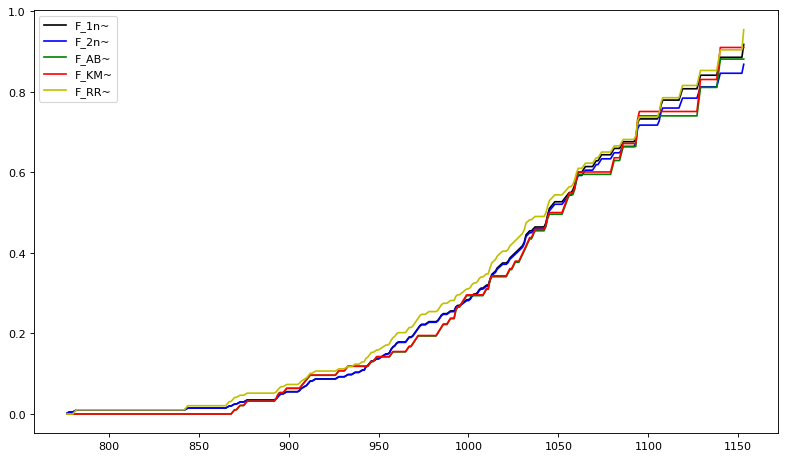

In [ ]:
plt.figure(figsize=(12,7), dpi=80)
plt.plot(x_,F_1n, color='k')
plt.plot(x_,F_2n, color='b')
plt.plot(x_,F_nuclear_AB, color='g')
plt.plot(x_,F_nuclear_KM, color='r')
plt.plot(x_,F_nuclear_RR, color='y')

plt.legend(['F_1n~', 'F_2n~','F_AB~', 'F_KM~', 'F_RR~' ])

plt.show()

## №2


#### Ядерные оценки для плотности:

In [ ]:
h_ = n**(-1/5)

In [ ]:
f_nuclear_KM = []
for i in range(len(x_)):
    f_nuclear_KM.append(Funk_nuclear(x_[i],1/h_,norm.pdf, delta_F_KM, h_))
# f_nuclear_KM

In [ ]:
f_nuclear_AB = []
for i in range(len(x_)):
    f_nuclear_AB.append(Funk_nuclear(x_[i],1/h_,norm.pdf, delta_F_AB, h_))
# f_nuclear_AB

In [ ]:
f_nuclear_RR = []
for i in range(len(x_)):
    f_nuclear_RR.append(Funk_nuclear(x_[i],1/h_,norm.pdf, delta_F_RR, h_))
# f_nuclear_RR

#### В МПИ:

In [ ]:
def h_n_nuclear(x):
  sum = 0
  for j in range(n):
    sum+=norm.pdf((x-z[j])/h_)
  return sum/(n*h_)


In [ ]:
def func_1n(x):
  return P_n * h_n_nuclear(x) * (1-H_n_nuclear(x))**(P_n - 1)

f_1n = []
for i in range(len(x_)):
  f_1n.append(func_1n(x_[i]))
# f_1n

In [ ]:
f_2n = []
for i in range(len(x_)):
  f_2n.append(Func_2n(x_[i],norm.pdf,h_))
# f_2n

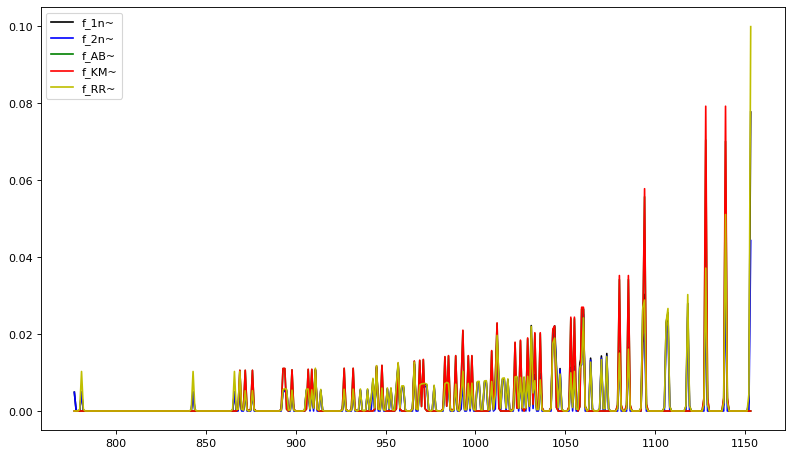

In [ ]:
plt.figure(figsize=(12,7), dpi=80)
plt.plot(x_,f_1n, color='k')
plt.plot(x_,f_2n, color='b')
plt.plot(x_,f_nuclear_AB, color='g')
plt.plot(x_,f_nuclear_KM, color='r')
plt.plot(x_,f_nuclear_RR, color='y')

plt.legend(['f_1n~', 'f_2n~','f_AB~', 'f_KM~', 'f_RR~'])

plt.show()

## Homework




## Сравнить оценки в МПИ графически


In [ ]:

sum=0
for d in delta:
  sum+=d
P_n = sum/n


In [ ]:
def Funk__(x):
    sum = 0
    for j in range(n):
        if z[j] > x:
            sum += 1
    return 1 - (sum / n) ** (P_n)

F_n__=[]
for x in x_:
  F_n__.append(Funk__(x))
# F_n__

In [ ]:
def Funk_2(x):
  return 1-np.exp(-((x-717)/358)**4)

F_2=[]
for x in x_:
  F_2.append(Funk_2(x))
# F_2

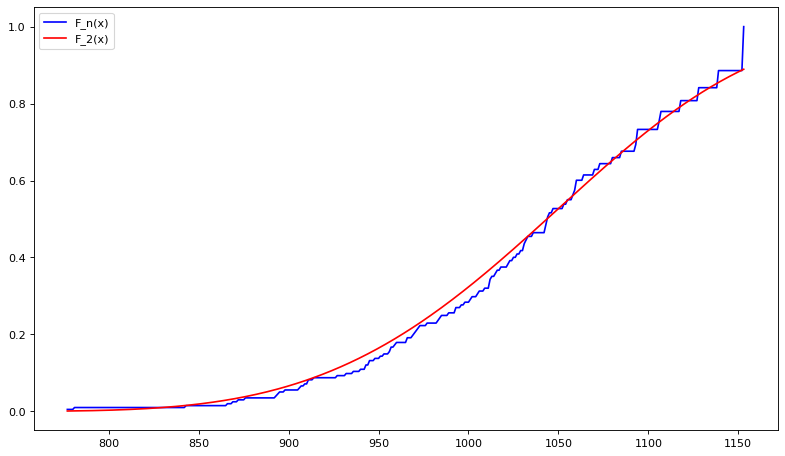

In [ ]:
plt.figure(figsize=(12,7), dpi=80)
plt.plot(x_,F_n__, color='b')
plt.plot(x_,F_2, color='r')
plt.legend(['F_n(x)','F_2(x)'])

plt.show()